This notebook shows an example of the data that's tracked and some visualizations that can be made. 

# Setup

In [1]:
from fallGuysStructures import *
from fallGuysFcns import *
import fallGuysVisuals as fgv

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import os, datetime
import pandas as pd
import numpy as np

# Some setup
plt.rcParams['font.size'] = 14

shows_df, rounds_df, qual_df = getDataFrames(testing=True) # would want to get rid of testing=True for others

finals_df = rounds_df[np.isin(rounds_df['Map'], list_of_finals)] # just finals
non_finals_df = rounds_df[~np.isin(rounds_df['Map'], list_of_finals)] # remove finals

In [2]:
shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards
887,888,2021-06-17 14:22:14.951000,4,79.353,event_only_slime_climb_2_1706_to_2006_2021,False,1,Infallible Laughing Penguin,1,19:23:34.304,30,0,0,45.0
888,889,2021-06-17 14:24:22.402000,4,128.738,event_only_slime_climb_2_1706_to_2006_2021,False,1,Infallible Laughing Penguin,1,19:26:31.140,30,0,0,45.0
889,890,2021-06-17 14:27:31.870000,4,532.846,squads_4player,False,3,Infallible Laughing Penguin,1,19:36:24.716,215,0,0,45.0
890,891,2021-06-17 14:41:34.467000,4,691.397,squads_4player,True,5,Infallible Laughing Penguin,1,19:53:05.864,645,0,0,5.0
891,892,2021-06-17 14:54:46.297000,4,377.990,squads_4player,False,2,Infallible Laughing Penguin,1,20:01:04.287,120,0,0,5.0


In [3]:
rounds_df.tail(10)

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
2833,890,0,round_door_dash_squads,43.985,61.453,True,6,30,0,1.0,70,0,silver,60,100,57.0,162.0,57.0,False,10.00
2834,890,1,round_gauntlet_06_squads,94.431,120.15,True,19,20,0,2.0,35,0,bronze,39,100,31.0,96.0,31.0,False,48.72
2835,890,2,round_slimeclimb_2_squads,28.180,131.221,False,19,60,0,3.0,0,0,NaN,27,100,8.0,19.0,8.0,False,70.37
2836,891,0,round_chompchomp_squads,34.384,54.984,True,28,30,0,2.0,35,0,bronze,60,100,57.0,139.0,56.0,False,46.67
2837,891,1,round_see_saw_squads,64.703,120.37,True,2,20,0,1.0,70,0,silver,39,100,34.0,92.0,34.0,False,5.13
2838,891,2,round_lava_squads,87.530,118.52,True,5,60,0,1.0,70,0,silver,28,100,12.0,66.0,12.0,False,17.86
2839,891,3,round_snowballsurvival_squads,55.400,60.4,True,2,50,0,0.0,35,0,gold,16,0,0.0,230.0,4.0,False,12.50
2840,891,4,round_basketfall_squads,90.370,90.41,True,1,240,0,2.0,35,0,bronze,8,0,0.0,5.0,4.0,True,12.50
2841,892,0,round_tunnel_race_squads,46.533,120.51,True,8,30,0,1.0,70,0,silver,60,100,48.0,118.0,48.0,False,13.33
2842,892,1,round_gauntlet_04_squads,68.689,109.853,False,29,20,0,3.0,0,0,NaN,37,100,34.0,34.0,33.0,False,78.38


# Map Stats

In [4]:
# Get a DataFrame containing info for each different map
maps_df = getMapInfoDataFrame(rounds_df, qual_df)
maps_df.head(10)

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_01,Hex-A-Gone 1 (Hex-a-gone Trials),Survival,126,113,89.682540,8.642857,7.619469,38.146195,41.268097,14.903,41.276044,7735,1740,61.388889,13.809524,NaN,113,0,0,0.309524
round_floor_fall_event_only_02,Hex-A-Gone 2 (Hex-a-gone Trials),Survival,113,95,84.070796,5.849558,4.778947,32.613684,65.525200,48.504,65.532053,5585,1276,49.424779,11.292035,NaN,95,0,0,0.477876
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,92,10,10.869565,4.380435,1.000000,11.027000,127.638100,118.136,127.640200,12870,783,139.891304,8.510870,NaN,10,0,0,2.673913
round_thin_ice_event_only_01,Thin Ice (Thin Ice Trials),Survival,79,70,88.607595,9.962025,8.957143,45.308143,37.288171,12.602,37.305729,4820,0,61.012658,0.000000,NaN,70,0,0,0.341772
round_jump_club_event_only_01,Jump Club 1 (Jump Around),Survival,77,70,90.909091,12.103896,10.742857,35.830714,36.621643,21.536,36.641571,4760,474,61.818182,6.155844,NaN,70,0,0,0.272727
round_fruitpunch_squads,None,None,71,42,59.154930,13.028169,9.619048,40.247857,81.841976,29.905,90.349048,4420,948,62.253521,13.352113,260.352113,42,0,0,1.225352
round_jump_club_event_only_02,Jump Club 2 (Jump Around),Survival,70,66,94.285714,10.700000,10.045455,43.295152,34.238061,24.956,34.268212,3710,306,53.000000,4.371429,NaN,66,0,0,0.171429
round_thin_ice_event_only_02,Thin Ice (Thin Ice Trials),Survival,70,61,87.142857,5.685714,4.868852,33.498689,67.950574,32.418,67.925672,3535,0,50.500000,0.000000,NaN,61,0,0,0.385714
round_jump_club_event_only_03,Jump Club 3 (Jump Around),Survival,66,56,84.848485,6.196970,4.964286,28.888750,39.862196,28.399,39.860446,5920,266,89.696970,4.030303,NaN,56,0,0,0.454545
round_biggestfan,Big Fans,Race,63,63,100.000000,8.507937,8.507937,17.313968,83.560730,55.290,176.656206,5440,2726,86.349206,43.269841,NaN,3,43,15,1.253968


# Round Stats

In [5]:
# Get a DataFrame containing info for each round number 
# (if a final occurs during round 5, that data is in 'final' and not '5')

# Give a switch to say if finals should be separate or not?
rounds_data_df = getRoundInfoDataFrame(rounds_df)
rounds_data_df

,Attempted,Qualified,Percent
Round Num,,,
1,892,786,88.116592
2,786,646,82.188295
3,485,355,73.195876
4,277,175,63.176895
5,52,23,44.230769
6,4,2,50.000000
final,347,42,12.103746


# Show Stats

In [6]:
# Get a DataFrame containing info for shows by season and total

# add new things to 'getShowStats'
shows_info_df = getShowsInfoDataFrame(shows_df)
shows_info_df

,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
2,117,8,47,598.054487,3.931624,360.811966,153.965812,40.170940,6.837607,19.436771,145.775781
3,318,23,206,389.181107,3.163522,265.235849,64.427673,64.779874,7.547170,34.377664,85.944161
4,457,13,186,438.744972,3.013129,244.201313,52.778993,40.700219,2.844639,55.696237,257.059554
total,892,44,439,441.971322,3.187220,266.995516,70.204036,49.215247,5.044843,109.510672,146.014229


# Playlist Stats

In [7]:
# Get a DataFrame containing info for shows by playlist and total
playlist_df = getPlaylistInfoDataFrame(shows_df, rounds_df)
playlist_df

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:427: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


,Total Shows,Total Wins,Total Finals,Average Time (s),Average Rounds,Average Kudos,Average Fame,% Made Finals,% Won,Total Time (hours),Minutes Per Win
main_show,242,18,107,587.101099,3.958678,365.661157,160.512397,44.214876,7.851240,39.466241,124.630233
event_only_hard_mode_2111_to_2711,2,0,0,325.063500,2.500000,132.500000,61.500000,0.000000,0.000000,0.180591,inf
event_season_3_highlight_1512_to_1912,9,0,5,571.339111,4.111111,305.555556,163.666667,55.555556,0.000000,1.428348,inf
event_only_floor_fall_0501_to_0701,37,1,32,340.677270,2.810811,184.054054,103.216216,86.486486,2.702703,3.501405,210.084317
event_fruit_basket_0801_to_1401,1,0,1,310.640000,3.000000,180.000000,106.000000,100.000000,0.000000,0.086289,inf
event_only_survival_2501_to_0102_2021,3,0,0,390.081333,2.666667,171.666667,104.666667,0.000000,0.000000,0.325068,inf
event_only_season_3_variation_0202_to_0702_2021,3,0,1,431.502000,3.333333,208.333333,118.333333,33.333333,0.000000,0.359585,inf
event_fan_favourites_0802_to_1102_2021,7,0,3,492.582571,3.285714,220.714286,121.857143,42.857143,0.000000,0.957799,inf
event_only_jump_club_1202_to_1402_2021,44,0,31,316.750114,3.500000,223.181818,26.954545,70.454545,0.000000,3.871390,inf
event_only_races_any_final_1502_to_1802_2021,1,0,0,593.942000,4.000000,265.000000,0.000000,0.000000,0.000000,0.164984,inf


# Squad Mode Stats

In [8]:
squad_shows_df, squad_rounds_df = getSquadDataFrames(shows_df, rounds_df)
squad_shows_df.tail()

,Show ID,Start Time,Season,Time Taken,Game Mode,Final,Rounds,Username,Party Size,addID,Kudos,Fame,Crowns,CurrentCrownShards,Wins
880,881,2021-06-16 22:20:54.975000,4,180.150,squads_4player,False,1,Infallible Laughing Penguin,3,03:23:55.125,30,0,0,23.0,0
881,882,2021-06-16 22:25:17.043000,4,536.843,squads_4player,False,3,Infallible Laughing Penguin,3,03:34:13.886,215,0,0,23.0,0
889,890,2021-06-17 14:27:31.870000,4,532.846,squads_4player,False,3,Infallible Laughing Penguin,1,19:36:24.716,215,0,0,45.0,0
890,891,2021-06-17 14:41:34.467000,4,691.397,squads_4player,True,5,Infallible Laughing Penguin,1,19:53:05.864,645,0,0,5.0,1
891,892,2021-06-17 14:54:46.297000,4,377.990,squads_4player,False,2,Infallible Laughing Penguin,1,20:01:04.287,120,0,0,5.0,0


In [9]:
squad_rounds_df.tail()

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
2838,891,2,round_lava_squads,87.530,118.52,True,5,60,0,1.0,70,0,silver,28,100,12.0,66.0,12.0,False,17.86
2839,891,3,round_snowballsurvival_squads,55.400,60.4,True,2,50,0,0.0,35,0,gold,16,0,0.0,230.0,4.0,False,12.50
2840,891,4,round_basketfall_squads,90.370,90.41,True,1,240,0,2.0,35,0,bronze,8,0,0.0,5.0,4.0,True,12.50
2841,892,0,round_tunnel_race_squads,46.533,120.51,True,8,30,0,1.0,70,0,silver,60,100,48.0,118.0,48.0,False,13.33
2842,892,1,round_gauntlet_04_squads,68.689,109.853,False,29,20,0,3.0,0,0,NaN,37,100,34.0,34.0,33.0,False,78.38


# Other

In [10]:
# Get a DataFrame containing data for only final maps
maps_df[ maps_df['Type'] == 'Final' ]

,Name,Type,Attempts,Times Qualified,Percent Qualified,Average Position,Average Qual Position,Average Norm Qual Position,Average Qual Time (s),Fastest Qual Time (s),Average Qual Round Times (s),Total Kudos,Total Fame,Average Kudos,Average Fame,Average Team Score,Bonus: Gold,Bonus: Silver,Bonus: Bronze,Average Tier
round_floor_fall_event_only_final,Hex-A-Gone Final (Hex-a-gone Trials),Final,92,10,10.869565,4.380435,1.000000,11.027000,127.638100,118.136,127.640200,12870,783,139.891304,8.510870,NaN,10,0,0,2.673913
round_thin_ice_event_only_final,Thin Ice (Thin Ice Trials),Final,61,6,9.836066,4.442623,1.000000,10.925000,157.186833,134.553,157.189000,8070,0,132.295082,0.000000,NaN,6,0,0,2.704918
round_jump_showdown_jump_club_event_only_final,Jump Showdown (Jump Around),Final,56,6,10.714286,4.732143,1.166667,10.528333,226.903667,139.286,226.909833,7210,140,128.750000,2.500000,NaN,6,0,0,2.678571
round_floor_fall,Hex-A-Gone,Final,40,2,5.000000,4.150000,1.000000,8.330000,106.807000,92.734,106.818000,4260,1086,106.500000,27.150000,NaN,2,0,0,2.850000
round_jump_showdown,Jump Showdown,Final,31,4,12.903226,5.096774,1.000000,9.820000,187.000750,142.522,187.005500,5060,1497,163.225806,48.290323,NaN,4,0,0,2.612903
round_fall_mountain_hub_complete,Fall Mountain,Final,28,8,28.571429,4.107143,1.000000,11.215000,38.614250,35.305,35.556250,7760,2148,277.142857,76.714286,NaN,8,0,0,2.142857
round_tunnel_final,Roll Off,Final,17,1,5.882353,4.058824,1.000000,11.110000,150.920000,150.920,150.922000,1875,380,110.294118,22.352941,NaN,1,0,0,2.823529
round_thin_ice,Thin Ice,Final,17,3,17.647059,4.588235,1.000000,9.443333,131.022333,105.602,131.025000,3365,889,197.941176,52.294118,NaN,3,0,0,2.470588
round_lava_event_only_slime_climb_final,Slime Climb 1 (SCT),Final,6,1,16.666667,3.500000,1.000000,33.330000,57.970000,57.970,57.972000,1215,314,202.500000,52.333333,NaN,1,0,4,1.833333
round_royal_rumble,Royal Fumble,Final,5,2,40.000000,3.400000,1.000000,16.670000,91.486000,90.200,90.350000,1760,263,352.000000,52.600000,NaN,2,0,0,1.800000


In [11]:
# Get a Series containing number of times eliminated by map
rounds_df[rounds_df['Qualified'] == False]['Map'].value_counts()

round_floor_fall_event_only_final                 82
round_thin_ice_event_only_final                   55
round_jump_showdown_jump_club_event_only_final    50
round_floor_fall                                  38
round_fruitpunch_squads                           29
                                                  ..
round_gauntlet_06                                  1
round_hoverboardsurvival_event_elimination         1
round_iceclimb_squads                              1
round_see_saw_event_elimination                    1
round_1v1_button_basher                            1
Name: Map, Length: 124, dtype: int64

In [12]:
# Get a DataFrame containing the finals that were won
finals_df[finals_df['Qualified']]

,Show ID,Round Num,Map,Time Spent,Round Length,Qualified,Position,Kudos,Fame,Bonus Tier,Bonus Kudos,Bonus Fame,BadgeId,Participants,Qualification Percent,Actual Num Qual,Team Score,Actual Num Qual with Finals,Timeout,Normalized Position
38,11,4,round_jump_showdown,181.522,181.524,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
207,54,4,round_fall_mountain_hub_complete,39.191,36.421,True,1,770,210,0.0,35,18,gold,5,0,1.0,NaN,NaN,NaN,20.00
215,56,4,round_floor_fall,120.880,120.9,True,1,770,210,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33
293,75,4,round_jump_showdown,142.522,142.524,True,1,770,210,0.0,35,18,gold,8,0,1.0,NaN,NaN,NaN,12.50
298,76,4,round_fall_mountain_hub_complete,38.975,36.203,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
317,82,4,round_fall_mountain_hub_complete,38.835,36.86,True,1,770,210,0.0,35,18,gold,9,0,1.0,NaN,NaN,NaN,11.11
356,91,4,round_fall_mountain_hub_complete,38.281,35.516,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
416,106,4,round_fall_mountain_hub_complete,35.305,32.538,True,1,770,210,0.0,35,18,gold,10,0,1.0,NaN,NaN,NaN,10.00
503,128,4,round_jump_showdown,225.239,225.244,True,1,770,175,0.0,35,18,gold,13,0,1.0,NaN,NaN,NaN,7.69
534,135,4,round_fall_mountain_hub_complete,39.421,36.672,True,1,770,175,0.0,35,18,gold,12,0,1.0,NaN,NaN,NaN,8.33


# Visuals

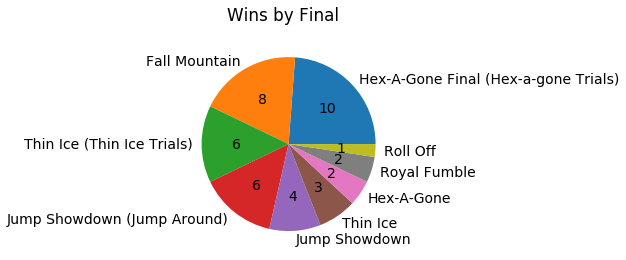

In [13]:
# Get a pie chart for final map wins
fgv.finalMapWinsPie(finals_df);

gold           1
silver        11
bronze        20
none           1
eliminated     9
Name: BadgeId, dtype: int64

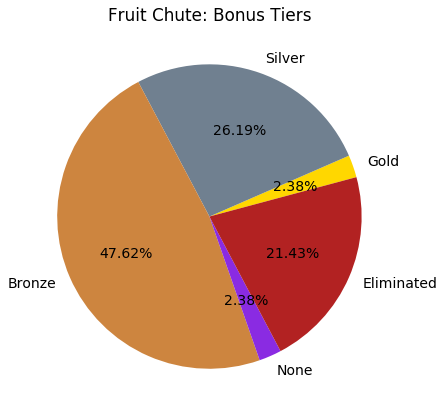

In [14]:
# Get a pie chart for a certain map - bonus tier
# can take either map names or their variables (round_dodge_fall)
fgv.mapBonusTiersPie(rounds_df, 'round_dodge_fall', eliminated=True, percent=True)

main_show                                   17
event_only_thin_ice_1903_to_2203_2021        5
event_only_floor_fall_2302_to_2502_2021      5
event_only_jump_club_1204_to_1404_2021       4
event_only_floor_fall_1203_to_1403_2021      2
event_only_jump_club_0603_to_0803_2021       2
event_only_floor_fall_0705_to_0905_2021      2
event_only_thin_ice_2904_to_0205_2021        1
event_only_slime_climb_0504_to_0804_2021     1
event_only_floor_fall_0501_to_0701           1
event_fan_favourites_1804_to_2004_2021       1
event_only_survival_0904_to_1104_2021        1
event_only_fall_ball_1005_to_1205_2021       1
Name: Game Mode, dtype: int64

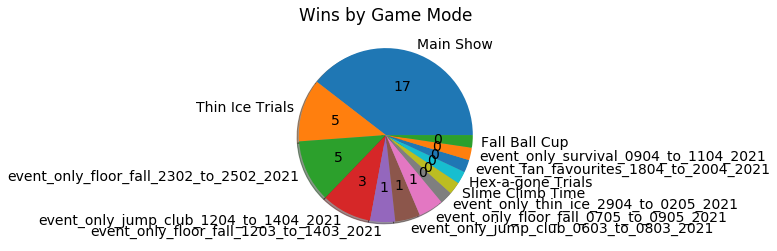

In [15]:
# Get a pie chart for wins by show
fgv.showWinsPie(shows_df)

In [16]:
# Get a Series containing times played each show
# extra for now
shows_df['Game Mode'].value_counts()

main_show                                           242
squads_4player                                      181
squads_4player_2203_to_0404_2021                     71
event_only_thin_ice_1903_to_2203_2021                55
event_only_jump_club_1202_to_1402_2021               44
event_only_floor_fall_1203_to_1403_2021              37
event_only_floor_fall_0501_to_0701                   37
event_only_floor_fall_2302_to_2502_2021              32
event_only_jump_club_1204_to_1404_2021               27
event_only_thin_ice_2904_to_0205_2021                24
event_only_survival_0904_to_1104_2021                22
event_only_floor_fall_0705_to_0905_2021              20
event_only_survival_1902_to_2202_2021                12
event_season_3_highlight_1512_to_1912                 9
event_only_slime_climb_0504_to_0804_2021              8
event_xtreme_fall_guys_2005_to_2205_2021              7
event_fan_favourites_0802_to_1102_2021                7
event_only_slime_climb_2_1706_to_2006_2021      

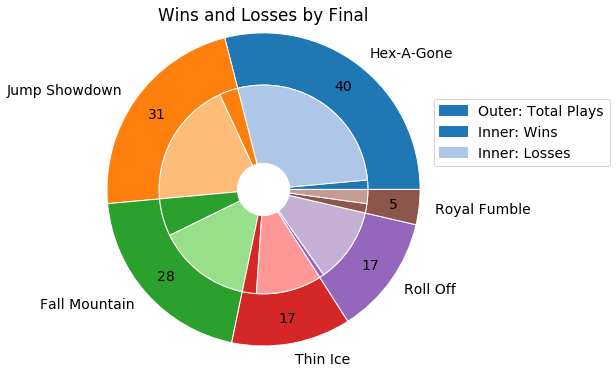

In [17]:
# Get a layered pie chart for plays vs wins and losses by final map
fgv.finalsWinsLossesPie(finals_df, regular=True, total_num=True); 

,overall,pos,neg
round_biggestfan,63,63,0
round_gauntlet_04,47,47,0
round_see_saw,44,44,0
round_gauntlet_01,43,41,2
round_gauntlet_05,32,32,0
round_gauntlet_02,32,31,1
round_door_dash,31,30,1
round_gauntlet_03,28,28,0
round_chompchomp,28,27,1
round_gauntlet_06,22,21,1


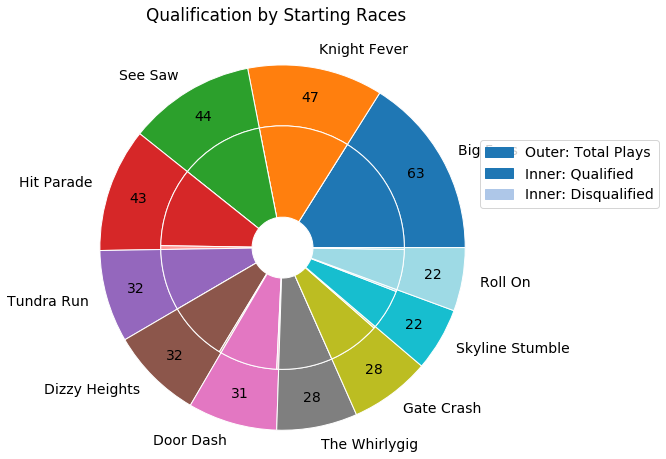

In [18]:
# Get a layered pie chart for qualfied vs non_qualified for starting races
fgv.startingRacesPie(rounds_df, total_num=True, pie_size=(7,7))

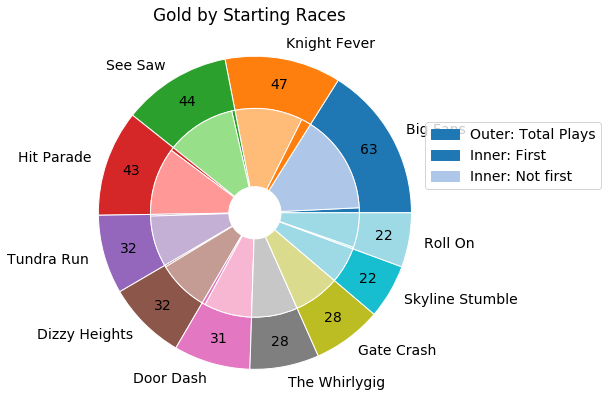

In [19]:
# Get a layered pie chart for gold vs non-gold for starting races
fgv.startingRacesPie(rounds_df, inner='gold', title='Gold by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='First', inner_neg_title='Not first', total_num=True);

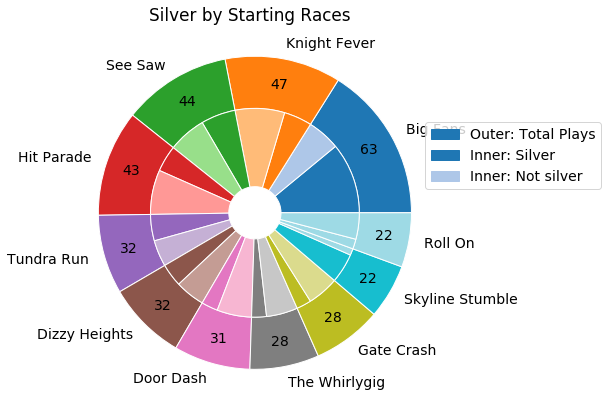

In [20]:
# Get a layered pie chart for silver vs non-silver for starting races
fgv.startingRacesPie(rounds_df, inner='silver', title='Silver by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Silver', inner_neg_title='Not silver', total_num=True);

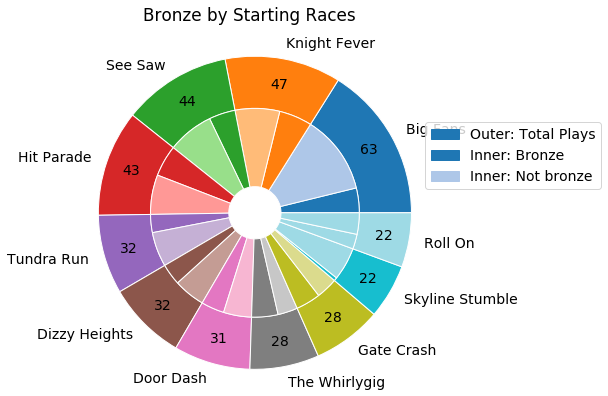

In [21]:
# Get a layered pie chart for bronze vs non-bronze for starting races
fgv.startingRacesPie(rounds_df, inner='bronze', title='Bronze by Starting Races', outer_title='Total Plays', 
                 inner_pos_title='Bronze', inner_neg_title='Not bronze', total_num=True);

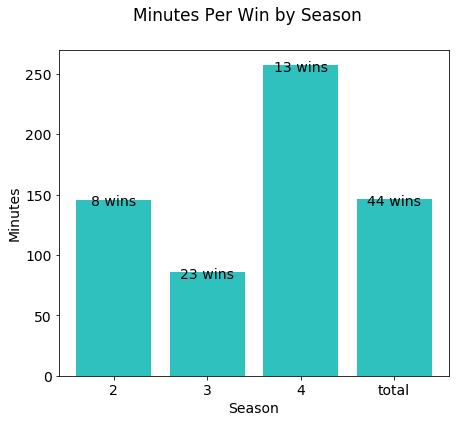

In [22]:
# Get a bar graph for average time per win by season and total
fgv.minutesPerWinBar(shows_info_df)

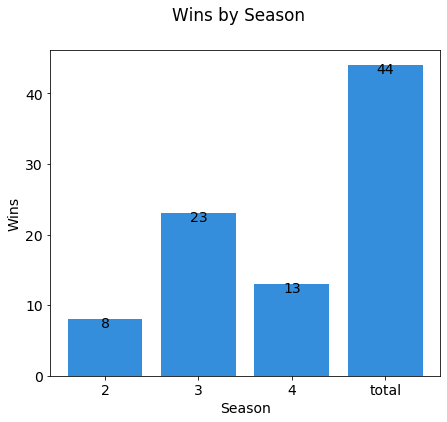

In [23]:
# Get a bar chart for wins by season
fgv.winsBySeasonBar(shows_info_df)

In [24]:
# Get win streaks (returns row ids for shows_df)
getStreaks(shows_df)

[[74, 75], [397, 398, 399], [680, 681]]

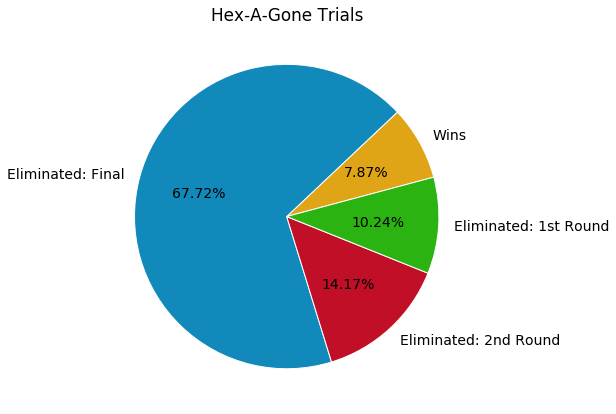

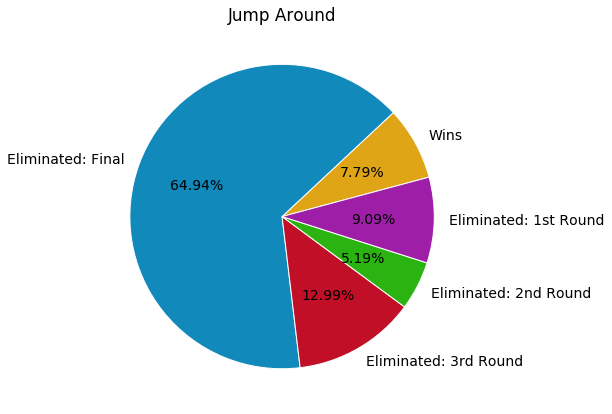

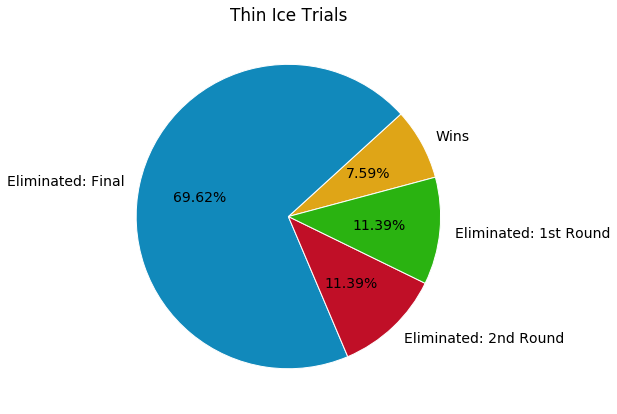

In [25]:
# Get a pie chart for success in playlists that are of the 'same' final
special_shows = ['event_only_floor_fall', 'event_only_jump_club', 'event_only_thin_ice']

for special_show in special_shows:
    fgv.specialShowsPie(special_show, shows_df, explode=False, percent=True)

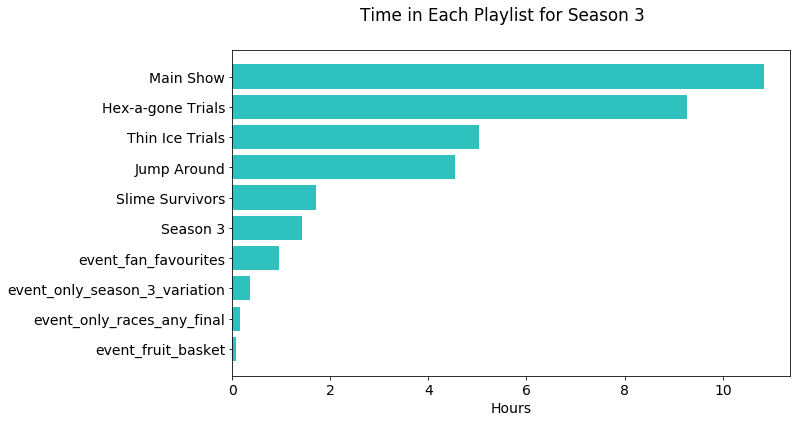

In [26]:
# Get a bar chart for playlist playtime for a season
fgv.seasonPlaylistTimeBar(shows_df, 3, True)

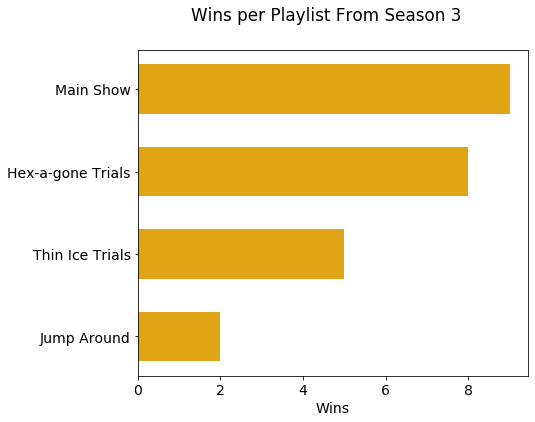

In [27]:
# Get a bar chart for wins per playlist from a season
fgv.seasonPlaylistWinsBar(shows_df, season=3)

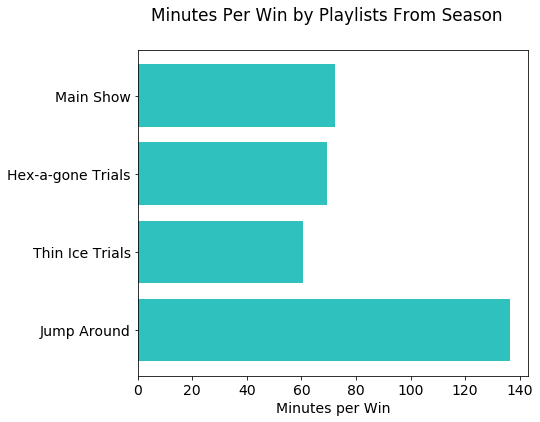

In [28]:
# Get a bar chart for minutes per win per playlist from a season
fgv.seasonPlaylistMinutesPerWinBar(shows_df, season=3)

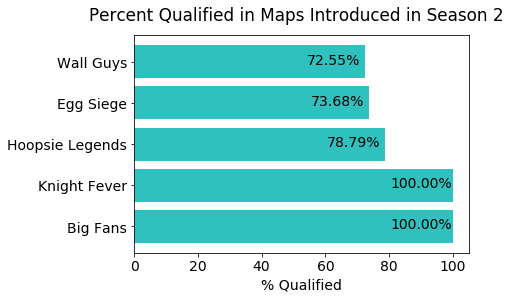

In [29]:
# Get a bar chart for percent qualified for maps introducted in a season
fgv.seasonMapsQualPercentBar(maps_df, season=2)

# side by side bars with attempts and times qualified?

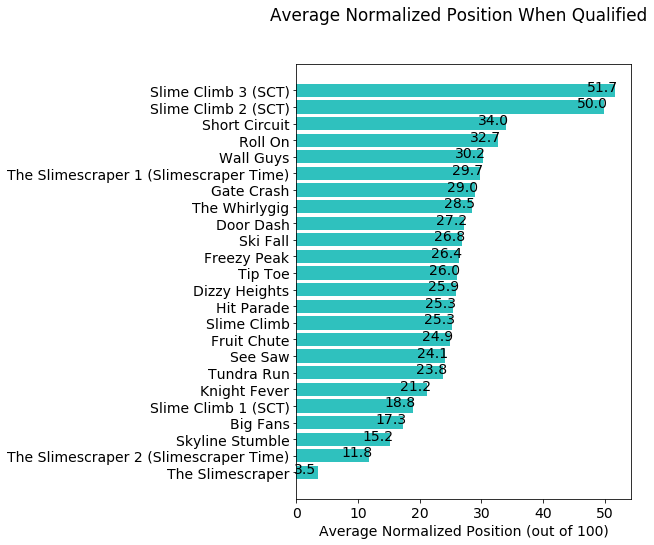

In [30]:
# Get a bar chart for average normalized position for race rounds when qualified
fgv.normalizedPositionRaceBar(maps_df)

C:\Users\Joseph\BreadTeleportationTechnology\DataScience\Fall Guys\fallGuysFcns.py:427: RuntimeWarning: divide by zero encountered in double_scalars
  'Minutes Per Win': shows_df['Time Taken'].sum() / 60 / shows_df['Crowns'].sum(),


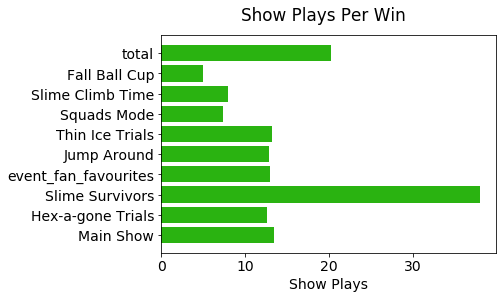

In [31]:
# Get a bar chart for plays per win for each playlist in a season (or overall)
fgv.playsPerWinPlaylistBar(shows_df, rounds_df, season=None, shorten=True)

0.4722222222222222

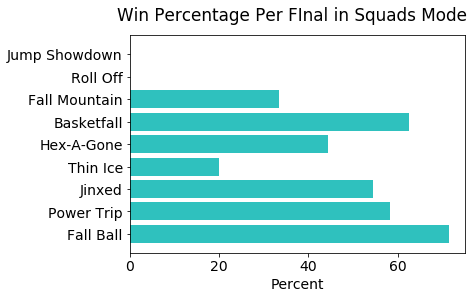

In [32]:
# Get a bar chart for win percentage in each final in Squads Mode
fgv.squadsFinalWinPercentBar(squad_shows_df, squad_rounds_df)

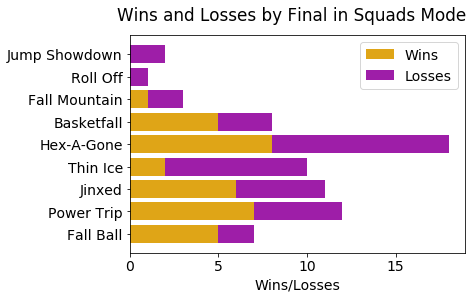

In [33]:
# Get a stacked bar plot for wins and fails per final in Squads Mode
fgv.squadsFinalStackedBar(squad_shows_df, squad_rounds_df)

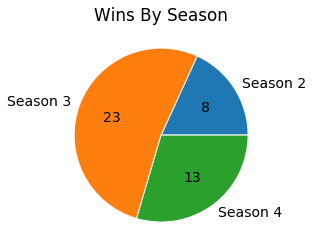

In [34]:
# Get a pie chart for normal wins by season
fgv.winsBySeasonPie(shows_df);

In [35]:
# Gets the top n times for a map
times = getTopTimes(rounds_df, shows_df, 'round_biggestfan', n=5)
times[['Time Spent', 'Show ID', 'Start Time', 'Season']]

,Time Spent,Show ID,Start Time,Season
0,55.290,113,2020-12-08 22:16:56.350000,2
1,55.319,633,2021-04-07 22:19:38.526000,4
2,55.339,115,2020-12-10 21:40:02.119000,2
3,56.420,103,2020-12-07 22:14:36.447000,2
4,61.155,35,2020-11-26 23:39:21.163000,2


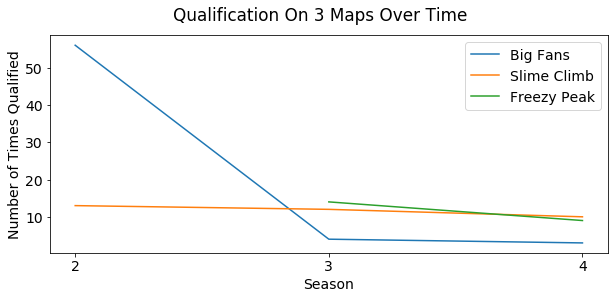

In [38]:
# Qualification percent by month
rounds = 'round_biggestfan'
rounds = ['round_biggestfan', 'round_lava', 'round_iceclimb']

# Get a line plot for performance on a map or list of maps over time
fgv.mapStatsOverTimeLine(rounds_df, shows_df, rounds, metric='qual', time_period='season', rotate=False)